# EDA - Fuente de datos 2
## Plan Anual de Adquisiones - Secop II
**Variables de fechas**

**Configuración de algoritmo:**
- Lectura de datos, en formato .pickle.
- Descripción de tipo de datos.
- Cambio en nombres de variables.
- Identificación de valores únicos por variable.
- Validación y depuración de variables temporales (fechas).
- Gráficos de años publicación y año PAA. 

**Importar librerías.**

In [1]:
# Load Packages
import os,sys
import pandas as pd
import numpy as np
from datetime import datetime

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

**Importar la base de datos (.pickle).**

In [2]:
import pickle 
import random

In [3]:
# Mostrar la ruta del archivo indiferente del sistema operativo
import os
os.getcwd()

'C:\\Users\\David\\OneDrive\\EAFIT\\Proyecto Integrador 1\\Repositorios\\proy-segmentacion\\jupyter\\DavidRuaJ'

In [4]:
main_path="C:\\Users\\David\\OneDrive\\EAFIT\\Proyecto Integrador 1\\Repositorios\\proy-segmentacion\\"
data_path="data\\"

In [5]:
os.chdir(main_path + data_path)

In [6]:
# Mostrar el directorio de trabajo, documentación de cualquier módulo de Python. 
os?

In [7]:
os.getcwd()

'C:\\Users\\David\\OneDrive\\EAFIT\\Proyecto Integrador 1\\Repositorios\\proy-segmentacion\\data'

In [8]:
df=pickle.load( open(r'df_raw_fuente_2.pickle', "rb" ) )
df.head()

,year,id_paa,entidad,nit,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_menor_cuantia,ppto_min_cuantia,...,ref_operacion,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
0,2018,CO1.APP.361029,COMANDO DE RECLUTAMIENTO Y CONTROL RESERVAS DE...,800130643,CO-DC-11001,Distrito Capital de Bogotá,MISIÓN: El Comando De Reclutamiento y Control ...,Con el fin de cumplir con la misión institucio...,781242000,78124200,...,131-DIREC-2018,2018-01-11 16:36:51.797000000,CCE-16-Servicios_profesionales_gestion,ELKIN ALONSO ARGOTE HIDALGO,V1.80121700,Servicios de responsabilidad civil,V1.80120000,Servicios legales,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
1,2019,CO1.APP.525808,SUPERINTENDENCIA DE TRANSPORTE,800170433,CO-DC-11001,Distrito Capital de Bogotá,"Vigilar, inspeccionar y controlar el cumplimie...",La Superintendencia de Puertos y Transporte vi...,231872480,23187248,...,IPMC 009-2019,2018-12-31 19:59:02.687000000,CCE-10-Minima_Cuantia,MARIA PIERINA GONZALEZ FALLA,V1.53101900,Trajes,V1.53100000,Ropa,V1.53000000,"Ropa, Maletas y Productos de Aseo Personal"
2,2019,CO1.APP.460110,FONAM - DTAN,901037393,CO-SAN-68001,Santander,Misión: Conservamos las áreas protegidas del S...,La entidad estatal va a contratar los procesos...,372652210,37265221,...,DTAN-CD-032-2019,2019-01-18 14:05:15.380000000,CCE-16-Servicios_profesionales_gestion,RUTH MILADY MEJIA OLARTE,V1.80111701,Servicios de contratación de personal,V1.80111700,Reclutamiento de personal,V1.80110000,Servicios de recursos humanos
3,2018,CO1.APP.338501,ESAP TERRITORIAL BOLIVAR,800248529,CO-BOL-13001,Bolívar,Formar ciudadanos y ciudadanas en los conocimi...,La ESAP en el 2019 será una institución de car...,507807300,50780730,...,CD-07-092-2018,2018-08-10 13:46:31.207000000,CCE-16-Servicios_profesionales_gestion,KAROLAIN MORENO,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
4,2018,CO1.APP.324303,GRUPO AÉREO DEL CARIBE,800141634,CO-SAP-88001,"San Andrés, Providencia y Santa Catalina",MISIÓN: Ejecutar operaciones aéreas para contr...,Consolidar una Fuerza Decisiva y efectiva en c...,781242000,78124200,...,010-00-N-GACAR-ESDEB-2018,2018-01-05 12:28:01.607000000,CCE-10-Minima_Cuantia,Diana katherine Quintana Cuervo,V1.10111302,Productos para el aseo y cuidado de mascotas,V1.10111300,Tratamientos para los animales domésticos y ac...,V1.10110000,Productos para animales domésticos


In [9]:
df[(df['nit']==890900286) & (df['precio_base']>=1566000000) & (df['year']==2019)].groupby('nombre_producto').count()

,year,id_paa,entidad,nit,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_menor_cuantia,ppto_min_cuantia,...,ref_contrato,ref_operacion,date_publised,modalidad,contacto,cod_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
nombre_producto,,,,,,,,,,,,,,,,,,,,,
Administración pública,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alcoholes o sus sustitutos,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Bebidas y Comidas Infantiles,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Componentes y accesorios de maquinaria industrial,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Conjuntos empernados de tubería,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Equipo de pavimentación,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Escuelas religiosas de educación primaria o secundaria,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Gerencia de proyectos,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Servicio de arriendo o leasing de plataformas o equipos de comunicación de datos,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [10]:
# https://www.colombiacompra.gov.co/tienda-virtual-del-estado-colombiano/ordenes-compra/31845

In [11]:
df.shape

(863969, 29)

In [12]:
df.dtypes

year                        int64
id_paa                     object
entidad                    object
nit                         int64
localizacion               object
localizacion_desc          object
mision_vision              object
pers_estrategica           object
ppto_menor_cuantia          int64
ppto_min_cuantia            int64
ppto_global                 int64
date_first_publication     object
mes_proyectado             object
id_item                    object
categoria_principal        object
precio_base               float64
date_last_publication      object
version                     int64
ref_contrato               object
ref_operacion              object
date_publised              object
modalidad                  object
contacto                   object
cod_producto               object
nombre_producto            object
cod_clase                  object
nombre_clase               object
cod_familia                object
nombre_familia             object
dtype: object

## Organizar los datos para una vista minable.

In [13]:
# Renombrar las columnas 
df  = df.rename(columns={
     'Anno':                        "year", 
     'Identificador PAA':           "id_paa",
     'Entidad':                     "entidad",
     'NIT':                         "nit",
     'Localización':                "localizacion",
     'DescripcionUbicacion':        "localizacion_desc",
     'Mision/Vision':               "mision_vision",
     'Perspectiva Estrategica':     "pers_estrategica",
     'Presupuesto Menor Cuantia':   "ppto_menor_cuantia",
     'Presupuesto Minima Cuantia':  "ppto_min_cuantia",
     'Presupuesto Global':          "ppto_global",
     'Fecha Primera Publicación':   "date_first_publication",
     'Mes Proyectado':              "mes_proyectado",
     'Identificador Item':          "id_item",
     'Categoria Principal':         "categoria_principal",
     'Precio Base':                 "precio_base",
     'Ultima Fecha Modificacion':   "date_last_publication",
     'Version':                     "version",
     'Referencia Contrato':         "ref_contrato",
     'Referencia Operacion':        "ref_operacion",
     'Fecha Publicacion':           "date_publised",
     'Modalidad':                   "modalidad",
     'Contacto':                    "contacto",
     'UNSPSC - Codigo Producto':    "cod_producto", 
     'UNSPSC - Nombre Producto':    "nombre_producto", 
     'UNSPSC - Codigo Clase':       "cod_clase",  
     'UNSPSC - Nombre Clase':       "nombre_clase", 
     'UNSPSC - Codigo Familia':     "cod_familia", 
     'UNSPSC - Nombre Familia':     "nombre_familia"
})

In [14]:
print(list(df.columns))

['year', 'id_paa', 'entidad', 'nit', 'localizacion', 'localizacion_desc', 'mision_vision', 'pers_estrategica', 'ppto_menor_cuantia', 'ppto_min_cuantia', 'ppto_global', 'date_first_publication', 'mes_proyectado', 'id_item', 'categoria_principal', 'precio_base', 'date_last_publication', 'version', 'ref_contrato', 'ref_operacion', 'date_publised', 'modalidad', 'contacto', 'cod_producto', 'nombre_producto', 'cod_clase', 'nombre_clase', 'cod_familia', 'nombre_familia']


In [15]:
# Validar los valores únicos de las variables
df.nunique(axis=0)
print(df.nunique(axis=0))

year                           5
id_paa                      2091
entidad                     1057
nit                          941
localizacion                 316
localizacion_desc             33
mision_vision               1648
pers_estrategica            1524
ppto_menor_cuantia           242
ppto_min_cuantia             211
ppto_global                 2086
date_first_publication      2091
mes_proyectado                13
id_item                   241220
categoria_principal         6192
precio_base                71796
date_last_publication        827
version                      174
ref_contrato              198629
ref_operacion             198667
date_publised               2091
modalidad                     13
contacto                    1643
cod_producto                6192
nombre_producto             6177
cod_clase                   1856
nombre_clase                1852
cod_familia                  414
nombre_familia               413
dtype: int64


## Analizamos las 5 variables de fechas en la base de datos:

In [16]:
# Variable year
print('\033[1m' + "year" + '\033[0m')
print(sorted(df.year.unique()))

# Variable mes_proyectado
print('\033[1m' + "\nMes Proyectado" + '\033[0m')
print(df.mes_proyectado.unique())

year
[2016, 2017, 2018, 2019, 2020]

Mes Proyectado
['Febrero' 'Noviembre' 'Enero' 'Agosto' 'Mayo' 'Abril' 'Octubre'
 'Diciembre' 'Julio' 'Septiembre' 'Marzo' 'Junio' 'No Definido']


In [17]:
# 3 variables de fecha completa
df[['date_first_publication','date_last_publication','date_publised']].head(10)

,date_first_publication,date_last_publication,date_publised
0,2018-01-11 16:36:51.797000000,01/17/2019,2018-01-11 16:36:51.797000000
1,2018-12-31 19:59:02.687000000,11/27/2019,2018-12-31 19:59:02.687000000
2,2019-01-18 14:05:15.380000000,07/12/2019,2019-01-18 14:05:15.380000000
3,2018-08-10 13:46:31.207000000,12/07/2018,2018-08-10 13:46:31.207000000
4,2018-01-05 12:28:01.607000000,11/13/2018,2018-01-05 12:28:01.607000000
5,2017-01-27 23:08:48.257000000,12/19/2017,2017-01-27 23:08:48.257000000
6,2019-01-16 16:26:48.843000000,12/18/2019,2019-01-16 16:26:48.843000000
7,2019-01-22 21:17:32.260000000,12/12/2019,2019-01-22 21:17:32.260000000
8,2018-01-02 17:08:27.597000000,01/04/2019,2018-01-02 17:08:27.597000000
9,2018-01-03 22:38:36.197000000,01/04/2019,2018-01-03 22:38:36.197000000


In [18]:
print(df['mes_proyectado'].value_counts(),'\n', df['mes_proyectado'].value_counts()/len(df))

Enero          302248
Febrero        147187
Marzo           88188
Julio           48658
Abril           40765
Mayo            40642
Agosto          39007
Junio           36292
Octubre         34408
Noviembre       30569
Septiembre      28875
Diciembre       25828
No Definido      1302
Name: mes_proyectado, dtype: int64 
 Enero          0.349837
Febrero        0.170361
Marzo          0.102073
Julio          0.056319
Abril          0.047183
Mayo           0.047041
Agosto         0.045149
Junio          0.042006
Octubre        0.039826
Noviembre      0.035382
Septiembre     0.033421
Diciembre      0.029895
No Definido    0.001507
Name: mes_proyectado, dtype: float64


Reemplazamos **'No Definido'** por **'Enero'**:

In [19]:
df['mes_proyectado'].replace('No Definido','Enero', inplace=True)
df['mes_proyectado'].value_counts()

Enero         303550
Febrero       147187
Marzo          88188
Julio          48658
Abril          40765
Mayo           40642
Agosto         39007
Junio          36292
Octubre        34408
Noviembre      30569
Septiembre     28875
Diciembre      25828
Name: mes_proyectado, dtype: int64

In [20]:
fechas_pub=np.where(df['date_first_publication']==df['date_publised'],True,False)
print(fechas_pub)

[ True  True  True ...  True  True  True]


In [21]:
print(set(fechas_pub))

{True}


**Podemos remover 'date_first_publication'**

In [22]:
df = df.drop(['date_first_publication'], axis=1)
df.shape

(863969, 28)

Convertimos las 2 variables de fecha, de tipo texto a tipo fecha:

In [23]:
df[['date_last_publication','date_publised']].dtypes

date_last_publication    object
date_publised            object
dtype: object

In [24]:
df[['date_last_publication','date_publised']]=df[['date_last_publication','date_publised']].astype('datetime64[ns]')
df['date_last_publication'].head()

0   2019-01-17
1   2019-11-27
2   2019-07-12
3   2018-12-07
4   2018-11-13
Name: date_last_publication, dtype: datetime64[ns]

In [25]:
df['date_publised'].head()

0   2018-01-11 16:36:51.797
1   2018-12-31 19:59:02.687
2   2019-01-18 14:05:15.380
3   2018-08-10 13:46:31.207
4   2018-01-05 12:28:01.607
Name: date_publised, dtype: datetime64[ns]

In [26]:
# Ajustar el formato de 'date_publised' a año-mes-dia
df['date_publised']=df['date_publised'].dt.strftime('%d/%m/%Y')
df['date_publised']=pd.to_datetime(df['date_publised'],format='%d/%m/%Y')
df['date_publised'].head()

0   2018-01-11
1   2018-12-31
2   2019-01-18
3   2018-08-10
4   2018-01-05
Name: date_publised, dtype: datetime64[ns]

**Consideremos los días entre los 2 campos 'date_last_publication' y 'date_publised':**

In [27]:
df['diff_dates']=(df['date_last_publication']-df['date_publised']).dt.days
df['diff_dates'].head(10)

0    371
1    331
2    175
3    119
4    312
5    326
6    336
7    324
8    367
9    366
Name: diff_dates, dtype: int64

In [28]:
print(sorted(df.diff_dates.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 83, 84, 87, 90, 91, 92, 93, 94, 95, 97, 98, 99, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 116, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 154, 155, 156, 157, 158, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247, 248, 250, 251

In [29]:
# Descripción de la nueva variable 'diff_dates'
df['diff_dates'].describe()

count    863969.000000
mean        346.638930
std          62.820638
min           0.000000
25%         352.000000
50%         366.000000
75%         366.000000
max        1204.000000
Name: diff_dates, dtype: float64

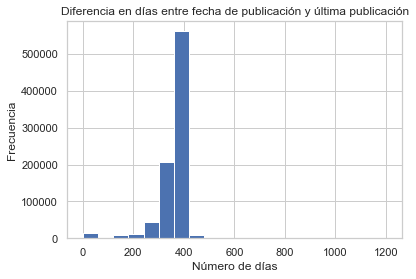

In [30]:
df['diff_dates'].plot(kind='hist', bins=20)
plt.title('Diferencia en días entre fecha de publicación y última publicación')
plt.ylabel('Frecuencia')
plt.xlabel('Número de días')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


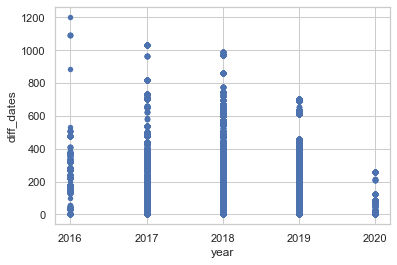

In [31]:
df[['year','diff_dates']].plot(kind='scatter',x='year',y='diff_dates')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()

**Comparación entre año de presupuesto (PAA) y año de publicación**

In [32]:
df['year_publised'] = pd.DatetimeIndex(df['date_publised']).year
df['year_publised'].head()

0    2018
1    2018
2    2019
3    2018
4    2018
Name: year_publised, dtype: int64

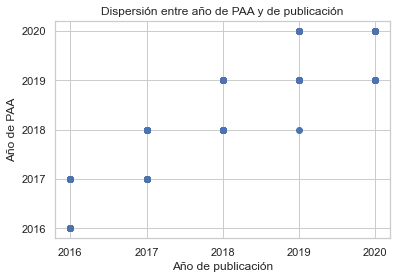

In [33]:
plt.scatter(df['year_publised'],df['year'])
plt.title('Dispersión entre año de PAA y de publicación')
plt.ylabel('Año de PAA')
plt.xlabel('Año de publicación')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.yticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()

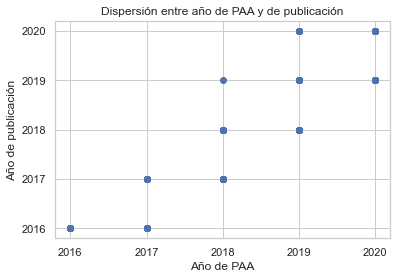

In [34]:
plt.scatter(df['year'],df['year_publised'])
plt.title('Dispersión entre año de PAA y de publicación')
plt.xlabel('Año de PAA')
plt.ylabel('Año de publicación')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.yticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()


**Agrupemos algunas variables por fechas:**

In [35]:
df.groupby(["year", 'year_publised'])["modalidad"].count()

year  year_publised
2016  2016               2493
2017  2016                910
      2017              24498
2018  2017              26570
      2018             686348
      2019                  1
2019  2018              12366
      2019             106035
      2020                  6
2020  2019                 15
      2020               1318
Name: modalidad, dtype: int64

In [36]:
# Groupby "modalidad"; "localizacion"; "nombre_producto"

In [37]:
df.to_pickle("Fuente_2_fechas.pickle")